In [1]:
import importlib.util
spec = importlib.util.spec_from_file_location("bltmat", "/Users/claudiopierard/WRF/bltmat.py")
blt = importlib.util.module_from_spec(spec)
spec.loader.exec_module(blt)

In [138]:
import numpy as np
import scipy as spy
import scipy.io as sio
import matplotlib.pyplot as plt
import scipy.optimize as optimization
%matplotlib inline
import datetime
import pandas as pan
pan.set_option('html', False)
#import matplotlib.dates as mdates

In [3]:
dt, raw, filt = blt.read_ceilometro_month('/Users/claudiopierard/WRF/Datos/ceilometro/ceilo_2015_UTC.dat')

In [4]:
ceilo = pan.DataFrame({'Datetime': dt, 'Raw': raw, 'Filtered': filt})

In [5]:
ceilo

,Datetime,Filtered,Raw
0,2015-01-09 17:50:00,620.0,620.0
1,2015-01-09 18:00:00,610.0,610.0
2,2015-01-09 18:10:00,700.0,700.0
3,2015-01-09 18:20:00,1330.0,1330.0
4,2015-01-09 18:30:00,1800.0,1800.0
5,2015-01-09 18:40:00,1330.0,1330.0
6,2015-01-09 18:50:00,1330.0,1330.0
7,2015-01-09 19:00:00,1330.0,1330.0
8,2015-01-09 19:10:00,1330.0,1330.0
9,2015-01-09 19:20:00,1330.0,1330.0


In [6]:
len(dt)

41200

In [7]:
len(raw)

41200

In [8]:
dt[0]

datetime.datetime(2015, 1, 9, 17, 50)

In [9]:
t = datetime.datetime.now()
t1 = t.timetuple()

In [10]:
t

datetime.datetime(2017, 10, 3, 8, 18, 32, 837042)

In [11]:
t1

time.struct_time(tm_year=2017, tm_mon=10, tm_mday=3, tm_hour=8, tm_min=18, tm_sec=32, tm_wday=1, tm_yday=276, tm_isdst=-1)

In [12]:
import time

In [13]:
time.mktime(t1)

1507036712.0

In [14]:
t_tuple = dt[0].timetuple()

In [15]:
t0 = time.mktime(dt[0].timetuple())

In [16]:
t1 = time.mktime(dt[1].timetuple())

In [17]:
t2 = time.mktime(dt[2].timetuple())

In [18]:
t0

1420847400.0

In [19]:
t1

1420848000.0

In [20]:
t2

1420848600.0

In [21]:
t0 - t1

-600.0

In [22]:
t1 - t2

-600.0

In [23]:
file_path = '/Users/claudiopierard/WRF/Datos/ceilometro/ceilo_2015_UTC.dat'

In [24]:
datetimes = list()
datenums = []
raws = []
filtereds = []
file = open(file_path, 'r')

for line in file:
    date, raw, filtered = line.split()
    date = datetime.datetime.strptime(date, '%Y-%m-%d-%H:%M:%S')
    date_num = time.mktime(date.timetuple())
    #print(time.mktime(date.timetuple()))
    datetimes.append(date)
    datenums.append(date_num)
    raws.append(float(raw))
    filtereds.append(float(filtered))


In [32]:
365*24*6

52560

In [33]:
(num_end - num_init)/(365*24*6)

599.9885844748859

In [34]:
np.linspace

<function numpy.core.function_base.linspace>

In [35]:
tiempo = np.linspace(num_init, num_end, 365*24*6)

In [36]:
tiempo.shape[0] / 6

8760.0

In [37]:
datos = np.zeros((tiempo.shape[0], 3))

In [38]:
len(datenums)

41200

In [39]:
datos[5,:]

array([ 0.,  0.,  0.])

In [41]:
for i in range(0, tiempo.shape[0]):
    for j in range(0, len(datenums)):
        if tiempo[i] == datenums[j]:
            datos[i, 0] = tiempo[i]
            datos[i, 1] = 
    

SyntaxError: invalid syntax (<ipython-input-41-d083b8fc3989>, line 5)

In [42]:
datos.shape

(52560, 3)

In [43]:
tiempo.shape

(52560,)

In [44]:
np.isnan(float('nan'))

True

In [45]:
num_init

1420092000.0

In [46]:
num_end

1451627400.0

In [47]:
datenums[2]%(600*

SyntaxError: unexpected EOF while parsing (<ipython-input-47-bede117be88d>, line 1)

In [48]:
j = 0
for i in diff_dnum:
    if i != 600.:
        print(j)
    j += 1

1800
2450
2594
3890
6692
8276
9140
9572
9716
9992
10292
12020
13028
13316
15332
17492
17537
20129
20204
20544
22926
23152
23440
23724
24082
25134
26942
29822
29966
30542
30898
32567
33076
33320
33349
35365
35653
36661
37237
38031
38751
39039
39471
40479


In [139]:
df = pan.DataFrame({"A":[0,0.5,1.0,3.5,4.0,4.5], "B":[1,4,6,2,4,3], "C":[3,2,1,0,5,3]})

In [140]:
df

     A  B  C
0  0.0  1  3
1  0.5  4  2
2  1.0  6  1
3  3.5  2  0
4  4.0  4  5
5  4.5  3  3

In [141]:
df.set_index("A")

     B  C
A        
0.0  1  3
0.5  4  2
1.0  6  1
3.5  2  0
4.0  4  5
4.5  3  3

In [142]:
np.linspace(0,5,11)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

In [53]:
new_index = pan.Index(np.linspace(0,5, 11), name="A")

In [54]:
df.set_index("A").reindex(new_index)

,B,C
A,,
0.0,1.0,3.0
0.5,4.0,2.0
1.0,6.0,1.0
1.5,NaN,NaN
2.0,NaN,NaN
2.5,NaN,NaN
3.0,NaN,NaN
3.5,2.0,0.0
4.0,4.0,5.0


In [55]:
df = df.set_index("A").reindex(new_index).reset_index()

In [56]:
df

,A,B,C
0,0.0,1.0,3.0
1,0.5,4.0,2.0
2,1.0,6.0,1.0
3,1.5,NaN,NaN
4,2.0,NaN,NaN
5,2.5,NaN,NaN
6,3.0,NaN,NaN
7,3.5,2.0,0.0
8,4.0,4.0,5.0
9,4.5,3.0,3.0


In [57]:
df.values

array([[ 0. ,  1. ,  3. ],
       [ 0.5,  4. ,  2. ],
       [ 1. ,  6. ,  1. ],
       [ 1.5,  nan,  nan],
       [ 2. ,  nan,  nan],
       [ 2.5,  nan,  nan],
       [ 3. ,  nan,  nan],
       [ 3.5,  2. ,  0. ],
       [ 4. ,  4. ,  5. ],
       [ 4.5,  3. ,  3. ],
       [ 5. ,  nan,  nan]])

In [58]:
np.savetxt('p.cei', df.values)

In [59]:
float('NaN')

nan

In [60]:
datos_ceilo = np.loadtxt('/Users/claudiopierard/WRF/Datos/ceilometro/ceilo_2015_UTC_timenum.dat')

In [61]:
datos_ceilo

array([[  1.42084740e+09,   6.20000000e+02,   6.20000000e+02],
       [  1.42084800e+09,   6.10000000e+02,   6.10000000e+02],
       [  1.42084860e+09,   7.00000000e+02,   7.00000000e+02],
       ..., 
       [  1.45164780e+09,   1.45000000e+03,   1.45000000e+03],
       [  1.45164840e+09,   6.90000000e+02,   6.90000000e+02],
       [  1.45164900e+09,   1.39000000e+03,   1.39000000e+03]])

In [62]:
datos_ceilo[0, 0]

1420847400.0

In [129]:
ceilo_df = pan.DataFrame({'timenum' : datos_ceilo[:, 0], 'Raw' : datos_ceilo[:, 1], 'Filtered' : datos_ceilo[:, 2]})

In [130]:
ceilo_df = ceilo_df.set_index(ceilo_df.pop('timenum'))

In [131]:
ceilo_df

,Filtered,Raw
timenum,,
1.420847e+09,620.0,620.0
1.420848e+09,610.0,610.0
1.420849e+09,700.0,700.0
1.420849e+09,1330.0,1330.0
1.420850e+09,1800.0,1800.0
1.420850e+09,1330.0,1330.0
1.420851e+09,1330.0,1330.0
1.420852e+09,1330.0,1330.0
1.420852e+09,1330.0,1330.0


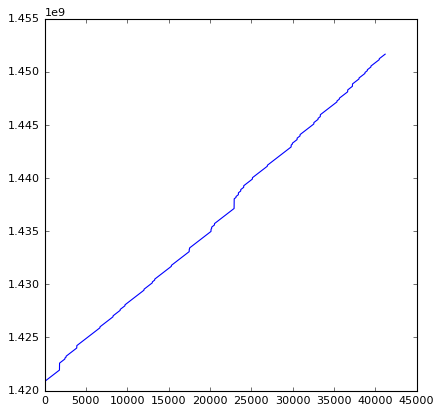

In [118]:
plt.figure(figsize=(6,6))
plt.plot(ceilo_df['timenum'])

In [65]:
ceilo_df.set_index('timenum')

,Filtered,Raw
timenum,,
1.420847e+09,620.0,620.0
1.420848e+09,610.0,610.0
1.420849e+09,700.0,700.0
1.420849e+09,1330.0,1330.0
1.420850e+09,1800.0,1800.0
1.420850e+09,1330.0,1330.0
1.420851e+09,1330.0,1330.0
1.420852e+09,1330.0,1330.0
1.420852e+09,1330.0,1330.0


In [66]:
dt_init = datetime.datetime(2015, 1, 1, 0, 0)

In [67]:
dt_end =  datetime.datetime(2015, 12, 31, 23, 50)

In [29]:
dt_end

datetime.datetime(2015, 12, 31, 23, 50)

In [68]:
num_init = time.mktime(dt_init.timetuple())

In [69]:
num_end = time.mktime(dt_end.timetuple())

In [70]:
num_init

1420092000.0

In [82]:
num_end -31557000.0

1420070400.0

In [84]:
(num_end - num_init)/600

52559.0

In [132]:
datetime_range = np.linspace(num_init, num_end, (num_end - num_init)/600)

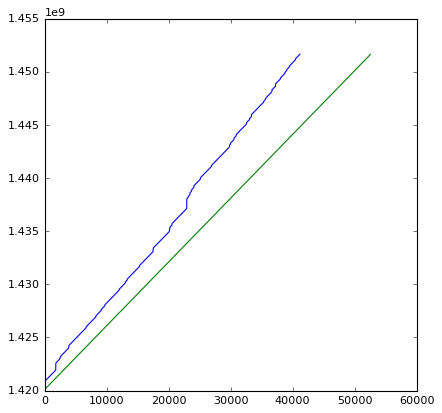

In [136]:
plt.figure(figsize=(6,6))
plt.plot(ceilo_df.index)
plt.plot(datetime_range)

In [87]:
datetime_range.shape

(52559,)

In [94]:
new_index = pan.Index(datetime_range, name="timenum")

In [95]:
new_index

Float64Index([ 1420092000.0, 1420092600.01, 1420093200.02, 1420093800.03,
              1420094400.05, 1420095000.06, 1420095600.07, 1420096200.08,
              1420096800.09,  1420097400.1,
              ...
               1451621999.9, 1451622599.91, 1451623199.92, 1451623799.93,
              1451624399.94, 1451624999.95, 1451625599.97, 1451626199.98,
              1451626799.99,  1451627400.0],
             dtype='float64', name='timenum', length=52559)

In [105]:
ceilo_df = ceilo_df.set_index('timenum')

In [ ]:
df.resample('1Min', how='max').reset_index().groupby('Timestamp').sum()

In [108]:
ceilo_df.resample('10Min', how = 'max')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Float64Index'

In [106]:
ceilo_df.reindex(new_index)

ValueError: cannot reindex from a duplicate axis

In [102]:
ceilo_df.set_index("timenum").reindex(new_index).reset_index()

,Filtered,Raw
timenum,,
1.420847e+09,620.0,620.0
1.420848e+09,610.0,610.0
1.420849e+09,700.0,700.0
1.420849e+09,1330.0,1330.0
1.420850e+09,1800.0,1800.0
1.420850e+09,1330.0,1330.0
1.420851e+09,1330.0,1330.0
1.420852e+09,1330.0,1330.0
1.420852e+09,1330.0,1330.0


In [110]:
plt.plot(ceilo_df['timenum'])

KeyError: 'timenum'